In [1]:
from pykalman import KalmanFilter
import numpy as np
import pandas as pd
import scipy.signal
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt

In [2]:
def find_period(signal):
    acf = np.correlate(signal, signal, 'full')[-len(signal):]
    inflection = np.diff(np.sign(np.diff(acf)))
    peaks = (inflection < 0).nonzero()[0] + 1
    return peaks[acf[peaks].argmax()]

In [3]:
def make_seasonal_model(data, column):
    data["x"] = data[column].astype(float)
    data = data.dropna()
    data_array = data["x"].to_numpy()
    kf = KalmanFilter(transition_matrices=[1],
                    observation_matrices=[1],
                    initial_state_mean=data_array[0],
                    initial_state_covariance=1,
                    observation_covariance=5,
                    transition_covariance=1) #0.01) 
    state_means, state_covariances = kf.filter(data_array) 

    period = find_period(np.diff(state_means.flatten()))

    print(period)
    train_data = state_means.flatten()
    normal_order = (0,1,0)
    season_order = (1,0,1, period)
    model = SARIMAX(train_data, order= normal_order, seasonal_order = season_order)
    model_fit = model.fit()
    return model, model_fit

In [4]:
def make_prediction(model_fit, look_ahead):
    predictions = model_fit.forecast(look_ahead)
    return predictions

In [5]:
load_data = pd.read_csv("./actual_load.csv")[-500:]
load_model, load_model_fit = make_seasonal_model(load_data, "Actual Load")

gen_data = pd.read_csv("./actual_generation.csv")
solar_model, solar_model_fit = make_seasonal_model(gen_data, "Solar")

hydro_model, hydro_model_fit = make_seasonal_model(gen_data, "Hydro Pumped Storage")

biomass_model, biomass_model_fit = make_seasonal_model(gen_data, "Biomass")


96


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.73603D+00    |proj g|=  6.64192D-01

At iterate    5    f=  7.04342D+00    |proj g|=  2.04706D-02

At iterate   10    f=  7.03724D+00    |proj g|=  5.70391D-03

At iterate   15    f=  7.03711D+00    |proj g|=  1.78005D-02

At iterate   20    f=  7.02128D+00    |proj g|=  1.88138D-01

At iterate   25    f=  6.97499D+00    |proj g|=  4.05248D-03

At iterate   30    f=  6.97380D+00    |proj g|=  1.95870D-02

At iterate   35    f=  6.97314D+00    |proj g|=  1.25020D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

In [6]:
load_predictions = make_prediction(load_model_fit, 30)
solar_predictions = make_prediction(solar_model_fit, 30)
hydro_predictions = make_prediction(hydro_model_fit, 30)
biomass_predictions = make_prediction(biomass_model_fit, 30)

[44866.71464076 44192.30917831 43606.29756709 43063.55178496
 42554.22078006 42087.48371613 41700.63380892 41371.89175794
 41119.1270335  40894.08013796 40728.26651169 40567.57478499
 40510.73597973 40449.34911577 40422.82208541 40427.53289691
 40551.0897539  40684.82268144 40836.83028415 40947.94011853
 41146.48127207 41308.75787221 41422.15548642 41551.85315659
 41757.50085529 41980.45193339 42239.06168256 42594.61013641
 43177.61876004 43718.72227478]


In [64]:


data = pd.read_csv("./actual_load.csv")
data = data.iloc[-500:]

data["Actual Load"] = data["Actual Load"].astype(float)
data = data.dropna()
data_array = data["Actual Load"].to_numpy()
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=data_array[0],
                  initial_state_covariance=1,
                  observation_covariance=5,
                  transition_covariance=1) #0.01) 
state_means, state_covariances = kf.filter(data_array) 

period = find_period(np.diff(state_means.flatten()))

print(period)
train_data = state_means.flatten()[:-30]
test_data = state_means.flatten()[-30:]
normal_order = (0,1,0)
season_order = (1,0,1, period)
model = SARIMAX(train_data, order= normal_order, seasonal_order = season_order)
model_fit = model.fit()


96


/home/collin/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.34689D+00    |proj g|=  1.00051D+00


 This problem is unconstrained.



At iterate    5    f=  7.06583D+00    |proj g|=  5.43479D-02

At iterate   10    f=  7.06269D+00    |proj g|=  1.34579D-03

At iterate   15    f=  7.06188D+00    |proj g|=  1.46393D-02

At iterate   20    f=  7.00212D+00    |proj g|=  1.22564D-01

At iterate   25    f=  6.98691D+00    |proj g|=  1.27800D-03

At iterate   30    f=  6.98616D+00    |proj g|=  1.22858D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     54      1     0     0   1.185D-04   6.986D+00
  F =   6.9860766892822221     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  470
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 96)   Log Likelihood               -3283.456
Date:                              Thu, 09 May 2024   AIC                           6572.912
Time:                                      10:04:51   BIC                           6585.364
Sample:                                           0   HQIC                          6577.811
                                              - 470                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L96       0.9982      0.002    532.249      0.000       0.995       1.002
ma.S.L96      -0.89

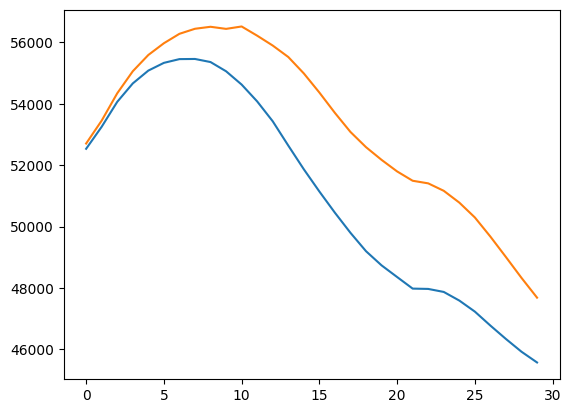

In [65]:
print(model_fit.summary())
predictions = model_fit.forecast(len(test_data))
print(train_data.shape, predictions.shape)
# predictions = np.concatenate((train_data.flatten(), predictions), axis=0)

plt.plot(test_data)
plt.plot(predictions)
plt.show()

In [66]:

data = pd.read_csv("./actual_generation.csv")
data = data.iloc[-300:]
data["Actual Load"] = data["Biomass"].astype(float)
data_array = data["Actual Load"].to_numpy()
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=data_array[0],
                  initial_state_covariance=1,
                  observation_covariance=5,
                  transition_covariance=1) #0.01) 
state_means, state_covariances = kf.filter(data_array) 

period = find_period(np.diff(state_means.flatten()))

print(period)
train_data = state_means.flatten()[:-30]
test_data = state_means.flatten()[-30:]
normal_order = (0,1,0)
season_order = (1,0,1, period)
model = SARIMAX(train_data, order= normal_order, seasonal_order = season_order)
model_fit = model.fit()


/tmp/ipykernel_6573/3843041173.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./actual_generation.csv")
/home/collin/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


96
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.63462D+00    |proj g|=  4.99028D-01

At iterate    5    f=  3.48501D+00    |proj g|=  6.95387D-02

At iterate   10    f=  3.38349D+00    |proj g|=  1.52731D-02

At iterate   15    f=  3.37805D+00    |proj g|=  5.58735D-03

At iterate   20    f=  3.37349D+00    |proj g|=  1.39081D-02

At iterate   25    f=  3.37245D+00    |proj g|=  3.89429D-03

At iterate   30    f=  3.37210D+00    |proj g|=  1.33186D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     52      1     0     0   6.309D-03   3.372D+00
  F =   3.3720899177790065     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  270
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 96)   Log Likelihood                -910.464
Date:                              Thu, 09 May 2024   AIC                           1826.929
Time:                                      10:05:20   BIC                           1837.713
Sample:                                           0   HQIC                          1831.259
                                              - 270                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L96       0.9982      0.064     15.591      0.000       0.873       1.124
ma.S.L96      -0.90

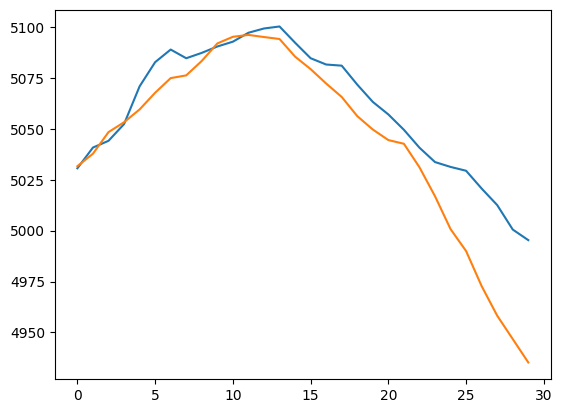

In [67]:
print(model_fit.summary())
predictions = model_fit.forecast(len(test_data))
print(train_data.shape, predictions.shape)
# predictions = np.concatenate((train_data.flatten(), predictions), axis=0)

plt.plot(test_data)
plt.plot(predictions)
plt.show()

/tmp/ipykernel_24790/3558845883.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./actual_generation.csv")


                      Unnamed: 0 Biomass Fossil Brown coal/Lignite  \
37716  2019-12-28 21:00:00+01:00  5029.0                    9130.0   
37717  2019-12-28 21:15:00+01:00  5023.0                    9104.0   
37718  2019-12-28 21:30:00+01:00  5031.0                    9072.0   
37719  2019-12-28 21:45:00+01:00  5031.0                    9087.0   
37720  2019-12-28 22:00:00+01:00  4994.0                    9142.0   
...                          ...     ...                       ...   
38011  2019-12-31 22:45:00+01:00  5026.0                    9092.0   
38012  2019-12-31 23:00:00+01:00  5005.0                    9031.0   
38013  2019-12-31 23:15:00+01:00  4998.0                    9012.0   
38014  2019-12-31 23:30:00+01:00  4979.0                    9038.0   
38015  2019-12-31 23:45:00+01:00  4986.0                    9074.0   

      Fossil Coal-derived gas Fossil Gas Fossil Gas.1 Fossil Hard coal  \
37716                     NaN     6662.0          NaN           3135.0   
37717      

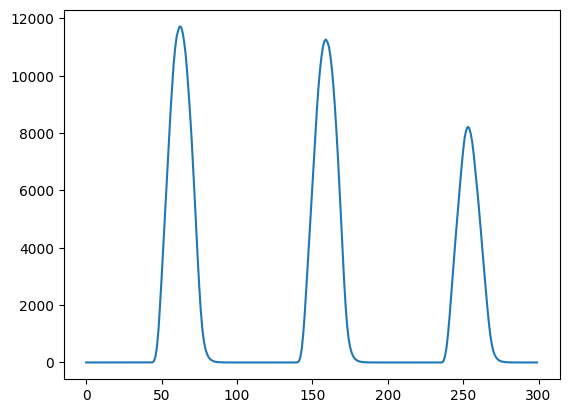

96


/home/collin/.local/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.39371D+00    |proj g|=  4.96874D-01


 This problem is unconstrained.



At iterate    5    f=  7.19608D+00    |proj g|=  4.80066D-02

At iterate   10    f=  7.18951D+00    |proj g|=  1.86058D-02

At iterate   15    f=  6.41993D+00    |proj g|=  6.80542D-01

At iterate   20    f=  6.19757D+00    |proj g|=  4.62268D-02

At iterate   25    f=  6.14776D+00    |proj g|=  4.14327D-03

At iterate   30    f=  6.14662D+00    |proj g|=  4.64105D-04

At iterate   35    f=  6.14647D+00    |proj g|=  1.22473D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     51      1     0     0   8.240D-06   6.146D+00
  F =   6.1464297204642664     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

In [7]:

data = pd.read_csv("./actual_generation.csv")
data = data.iloc[-300:]
print(data)
# data["Actual Load"] = data["Hydro Pumped Storage"].astype(float)
data["Actual Load"] = data["Solar"].astype(float)

data_array = data["Actual Load"].to_numpy()
kf = KalmanFilter(transition_matrices=[1],
                  observation_matrices=[1],
                  initial_state_mean=data_array[0],
                  initial_state_covariance=1,
                  observation_covariance=5,
                  transition_covariance=1) #0.01) 
state_means, state_covariances = kf.filter(data_array) 
plt.plot(state_means.flatten())
plt.show()
period = find_period(np.diff(state_means.flatten()))


print(period)
train_data = state_means.flatten()[:-80]
test_data = state_means.flatten()[-80:]
normal_order = (0,1,0)
season_order = (1,0,1, period)
model = SARIMAX(train_data, order= normal_order, seasonal_order = season_order)
model_fit = model.fit()

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  220
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 96)   Log Likelihood               -1352.215
Date:                              Thu, 09 May 2024   AIC                           2710.429
Time:                                      10:51:46   BIC                           2720.596
Sample:                                           0   HQIC                          2714.535
                                              - 220                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L96       0.9902      0.003    304.063      0.000       0.984       0.997
ma.S.L96       0.97

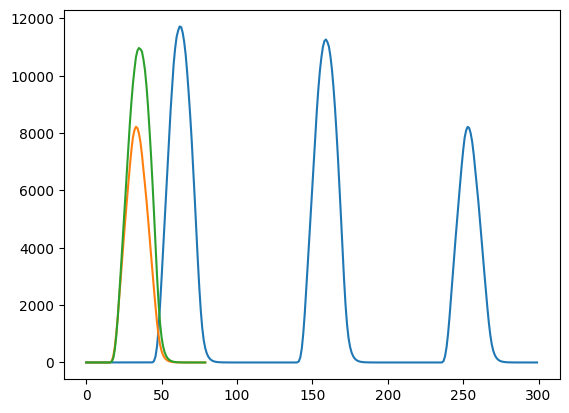

In [97]:
print(model_fit.summary())
predictions = model_fit.forecast(len(test_data))
print(train_data.shape, predictions.shape)
# predictions = np.concatenate((train_data.flatten(), predictions), axis=0)
plt.plot(state_means.flatten())
plt.plot(test_data)
plt.plot(predictions)
plt.show()